In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
#Cargar archivos
#Frecuencia de muestreo: 66.67 Hz 
import os 
ruta=os.getcwd()
archivo=os.listdir(ruta+'/muestras_emg')
sujetos=[] 
for i in archivo: 
    x1=np.loadtxt(ruta+'/muestras_emg'+'/'+i,delimiter='\t')
    sujetos.append(x1)

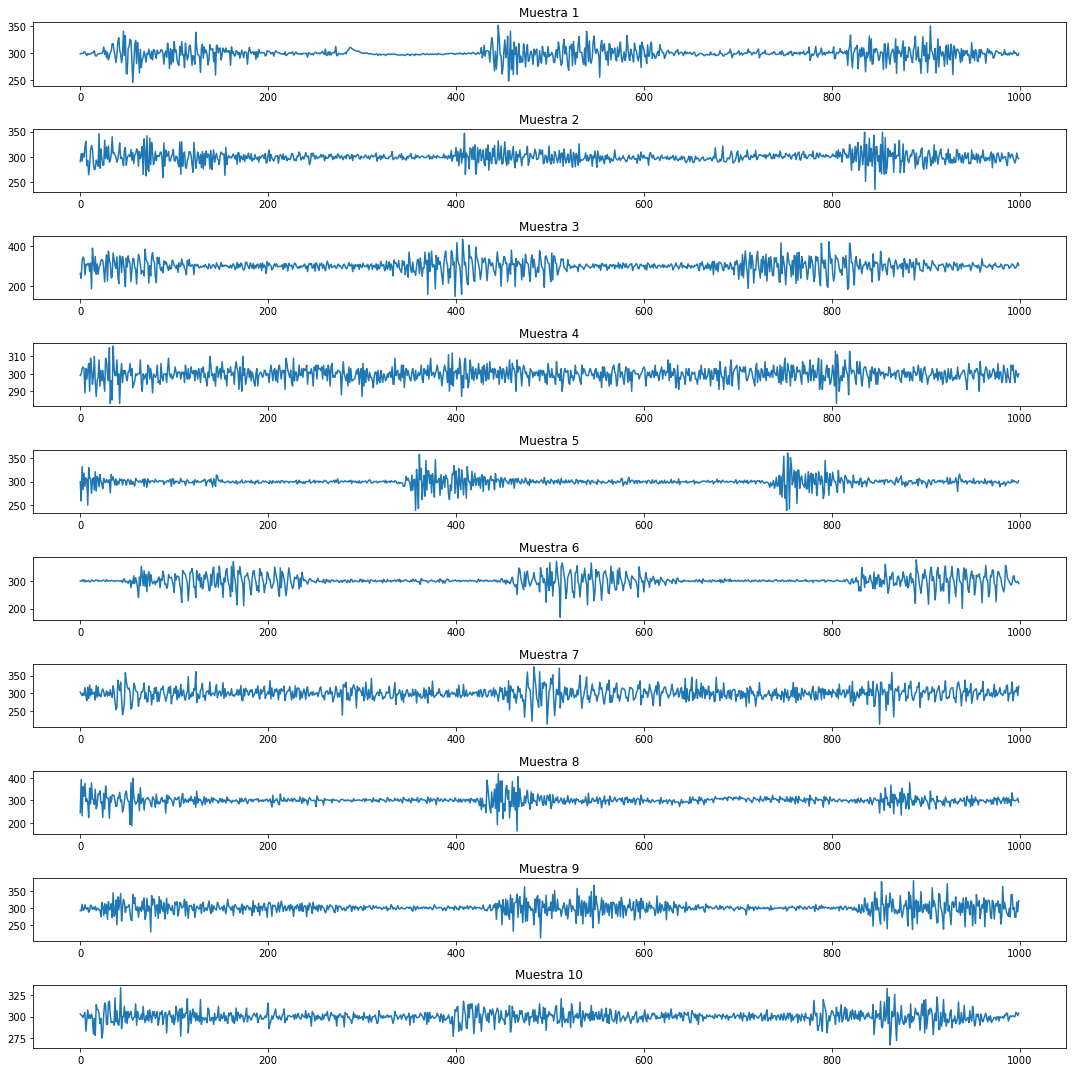

In [85]:
#aquí graficar muestras
plt.figure(figsize=(15,15))
for i in range(len(sujetos)):
    plt.subplot(len(sujetos),1,i+1)
    plt.plot(sujetos[i])
    plt.title(f'Muestra {i+1}')
plt.tight_layout()

In [74]:
#Esta casilla es para separar los tipos de mov flexión y extensión según los tiempos.
movs=[] #donde guardar todos los movimientos separados
tset=134 #cada dos segundos hay cambio de movimiento. 2 segundos -> 134 datos aprox.
for i in sujetos:
    for k in range(1,7): #3 flexiones, 3 extensiones. 2 primeros segundos se descartan
        mov=i[(tset*k):(tset*(k+1))]
        movs.append(mov) 
#como movimientos van intercalados, posiciones pares corresponden a un mov y las impares al otro
flexion=movs[::2]
extension=movs[1::2]

In [75]:
#operador tkeo
def tkeo(data): 
    x=data*1
    x[1:-1]=np.square(x[1:-1])-np.multiply(x [0:-2],x[2:]) #aplica la función para todos los datos menos el primero y el último, que no es un problema (describir en análisis)
    return x[1:-1]

In [76]:
def rms(x): #x es un array
    x_squared=np.square(x)
    x_mean=np.mean(x_squared)
    xrms=np.sqrt(x_mean)
    return xrms

In [77]:
def caracteristicas(data): 
    caracs={'xrms':'','xvar':'','xmav':'','xmavs':'','xssc':'','xwl':'','xzc':''}
    xrms=rms(data) #root mean square
    caracs['xrms']=xrms
    xvar=np.var(data) #varianza
    caracs['xvar']=xvar
    xmav=np.mean(np.abs(data)) #mean absolute value
    caracs['xmav']=xmav
    xmavs=np.mean(np.abs(np.diff(data))) #mean absolute value slope
    caracs['xmavs']=xmavs
    derivative = np.diff(data)
    xssc = np.sum(np.diff(np.sign(derivative)) != 0) #Slope sign changes
    caracs['xssc']=xssc
    diff_abs = np.abs(np.diff(data))
    xwl = np.sum(diff_abs) #waveform length
    caracs['xwl']=xwl
    xzc = len(np.where(np.diff(np.sign(data)))[0]) #zero crossings
    caracs['xzc']=xzc
    return caracs, [xrms,xvar,xmav,xmavs,xssc,xwl,xzc]

Análisis exploratorio

In [78]:
#calculo de caracteristicas y tkeo de todos los sujetos 
caracs_flexion=[] #todas las características de todas las muestras
for sujeto in flexion:
    sujeto_tkeo=tkeo(sujeto) 
    car_flex,car=caracteristicas(sujeto_tkeo) 
    for i in car:
        caracs_flexion.append(i)

caracs_extension=[] #todas las características de todas las muestras
for sujeto in extension:
    sujeto_tkeo=tkeo(sujeto)
    car_ext,car=caracteristicas(sujeto_tkeo) 
    for i in car:
        caracs_extension.append(i)

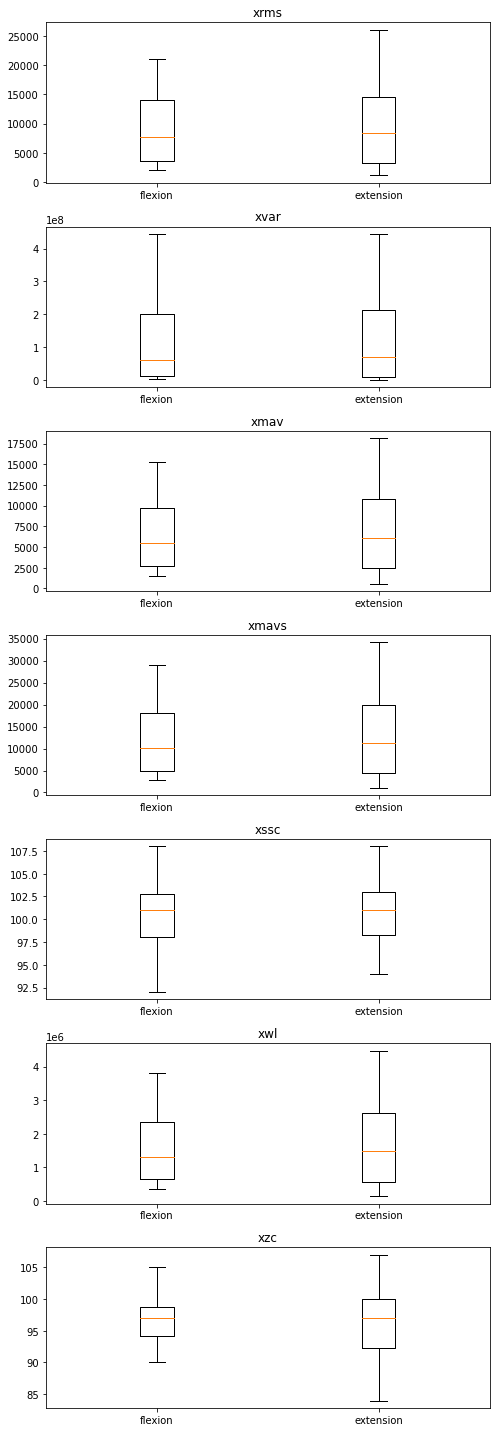

In [86]:
#Graficas
flex=np.array(caracs_flexion)
ext=np.array(caracs_extension)
flex=np.reshape(flex,(len(sujetos)*3,7)) #reshape para plotear más fácil
ext=np.reshape(ext,(len(sujetos)*3,7))
plt.figure(figsize=(7,20))
names=['xrms','xvar','xmav','xmavs','xssc','xwl','xzc']
for i in range(0,7):
    plt.subplot(7,1,i+1)
    plt.boxplot((flex[:,i], ext[:,i]), showfliers=False) 
    plt.xticks([1,2],['flexion','extension'])
    plt.title(names[i])
plt.tight_layout()


Pruebas de hipótesis

In [ ]:
#Por cómo se ven los boxplot, tal vez al único que se pueda comparar sea el zc, con y sin outliers